In [ ]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 476, done.
remote: Counting objects: 100% (207/207), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 476 (delta 141), reused 124 (delta 91), pack-reused 269
Receiving objects: 100% (476/476), 131.59 KiB | 7.74 MiB/s, done.
Resolving deltas: 100% (243/243), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 626.6 kB/s eta 0:00:00
***********************************************************************
Woo! Your instance has a Tesla T4 GPU!
We will install the latest stable RAPIDS via pip 24.4.*!  Please stand by, should be quick...
***********************************************************************

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 473.3/473.3 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 GB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 GB 88

In [ ]:
import cudf as pd
import cuml
import os
import cupy as np

In [ ]:
df = pd.read_csv('Data/CarPrice.csv')
df = pd.DataFrame(data = df)
df.head()

,Brand & Model,Varient,Fuel Type,Driven Kilometers,Transmission,Owner,Location,Date of Posting Ad,Price (in ₹)
0,Mahindra Xuv500 (2013),W8 Dual Tone,DIESEL,"58,000 KM",MANUAL,1st Owner,"Pitampura, Delhi",01/27/2022,435000
1,Hyundai Creta (2020),1.6 SX Option Executive Diesel,DIESEL,43861.0 KM,MANUAL,1st Owner,"Ahiritola, Kolkata",01/23/2022,1165101
2,Hyundai Verna (2019),VTVT 1.4 EX,PETROL,"17,000 KM",MANUAL,2nd Owner,"Chelavoor, Pantheeramkavu",01/25/2022,815000
3,Datsun Redigo (2020),D,PETROL,10000 KM,MANUAL,1st Owner,"Palam, Delhi",01/13/2022,270000
4,Hyundai I10 (2011),Sportz 1.1 iRDE2,PETROL,70000 KM,MANUAL,1st Owner,"Dwarka Sector 13, Delhi",01/13/2022,185000


In [ ]:
df.tail()

,Brand & Model,Varient,Fuel Type,Driven Kilometers,Transmission,Owner,Location,Date of Posting Ad,Price (in ₹)
5045,maruti suzuki 800 (1970),EX 5 Speed,LPG,"500,000 Km",Automatic,1st Owner,Alipur,01/23/2022,50000
5046,renault duster (2012),2012-2015 110PS Diesel RxZ,Diesel,"111,000 Km",Manual,1st Owner,"MDDA Colony Near Kedarpuram, Dehradun",01/23/2022,320000
5047,hyundai santro (2021),Sportz AMT,Petrol,"5,500 Km",Automatic,1st Owner,"Pragati Nagar, Ahmedabad",01/23/2022,599000
5048,hyundai verna (2013),VTVT 1.6 EX,Petrol,61231.0 Km,Manual,1st Owner,"Malad West, Mumbai",01/27/2022,395000
5049,maruti suzuki swift dzire (2019),VXI,Diesel,"58,000 Km",Manual,1st Owner,"Kukatpally, Hyderabad",01/23/2022,580000


In [ ]:
df.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Brand & Model       5050 non-null   object
 1   Varient             5011 non-null   object
 2   Fuel Type           5050 non-null   object
 3   Driven Kilometers   5050 non-null   object
 4   Transmission        5050 non-null   object
 5   Owner               5050 non-null   object
 6   Location            5050 non-null   object
 7   Date of Posting Ad  5050 non-null   object
 8   Price (in ₹)        5050 non-null   int64
dtypes: int64(1), object(8)
memory usage: 640.4+ KB


In [ ]:
df.isnull().sum()

Brand & Model          0
Varient               39
Fuel Type              0
Driven Kilometers      0
Transmission           0
Owner                  0
Location               0
Date of Posting Ad     0
Price (in ₹)           0
dtype: int64

<Axes: >

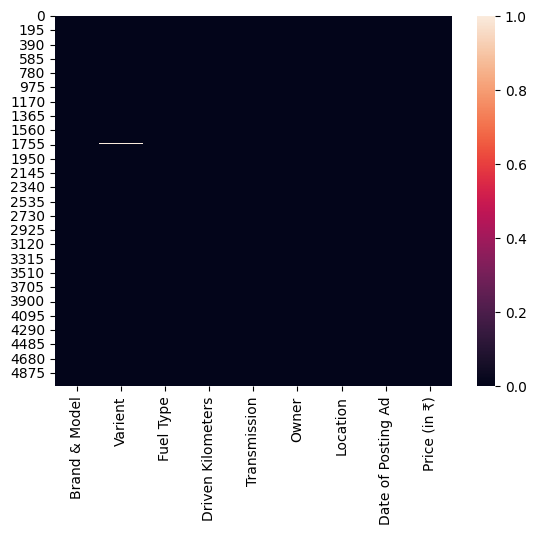

In [ ]:
import seaborn as sn
import pandas as pds
disp = pds.read_csv('/content/CarPrice.csv')
sn.heatmap(disp.isnull())

In [ ]:
df = df.dropna(subset=['Varient'])

In [ ]:
df.isnull().sum()

Brand & Model         0
Varient               0
Fuel Type             0
Driven Kilometers     0
Transmission          0
Owner                 0
Location              0
Date of Posting Ad    0
Price (in ₹)          0
dtype: int64

<Axes: ylabel='Price (in ₹)'>

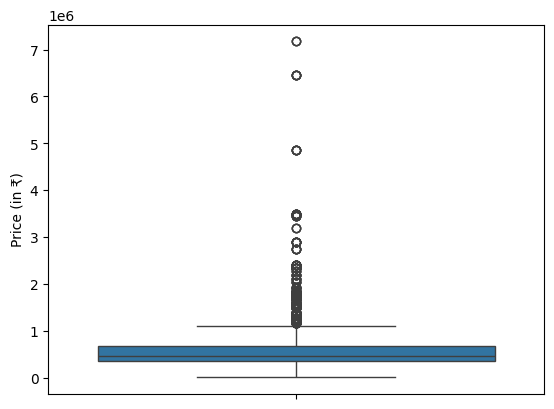

In [ ]:
sn.boxplot(disp['Price (in ₹)'])

<ipython-input-12-2e3b5794b4da>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(disp['Price (in ₹)'])


<Axes: xlabel='Price (in ₹)', ylabel='Density'>

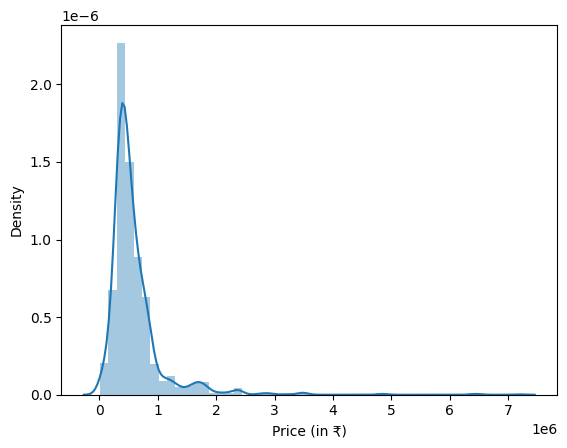

In [ ]:
sn.distplot(disp['Price (in ₹)'])

<ipython-input-13-a06584416a84>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  sn.histplot(data=disp[collist[i]],color='red').set_xticklabels(labels=disp[collist[i]].unique(),rotation=90)
<ipython-input-13-a06584416a84>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  sn.histplot(data=disp[collist[i]],color='red').set_xticklabels(labels=disp[collist[i]].unique(),rotation=90)
<ipython-input-13-a06584416a84>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  sn.histplot(data=disp[collist[i]],color='red').set_xticklabels(labels=disp[collist[i]].unique(),rotation=90)
<ipython-input-13-a06584416a84>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  sn.histplot(data=disp[collist[i]],color='red').set_xticklabels(labels=disp[collist[i]].unique(),rotation=90)
<ipython-input-13-a06584416a84>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  sn.h

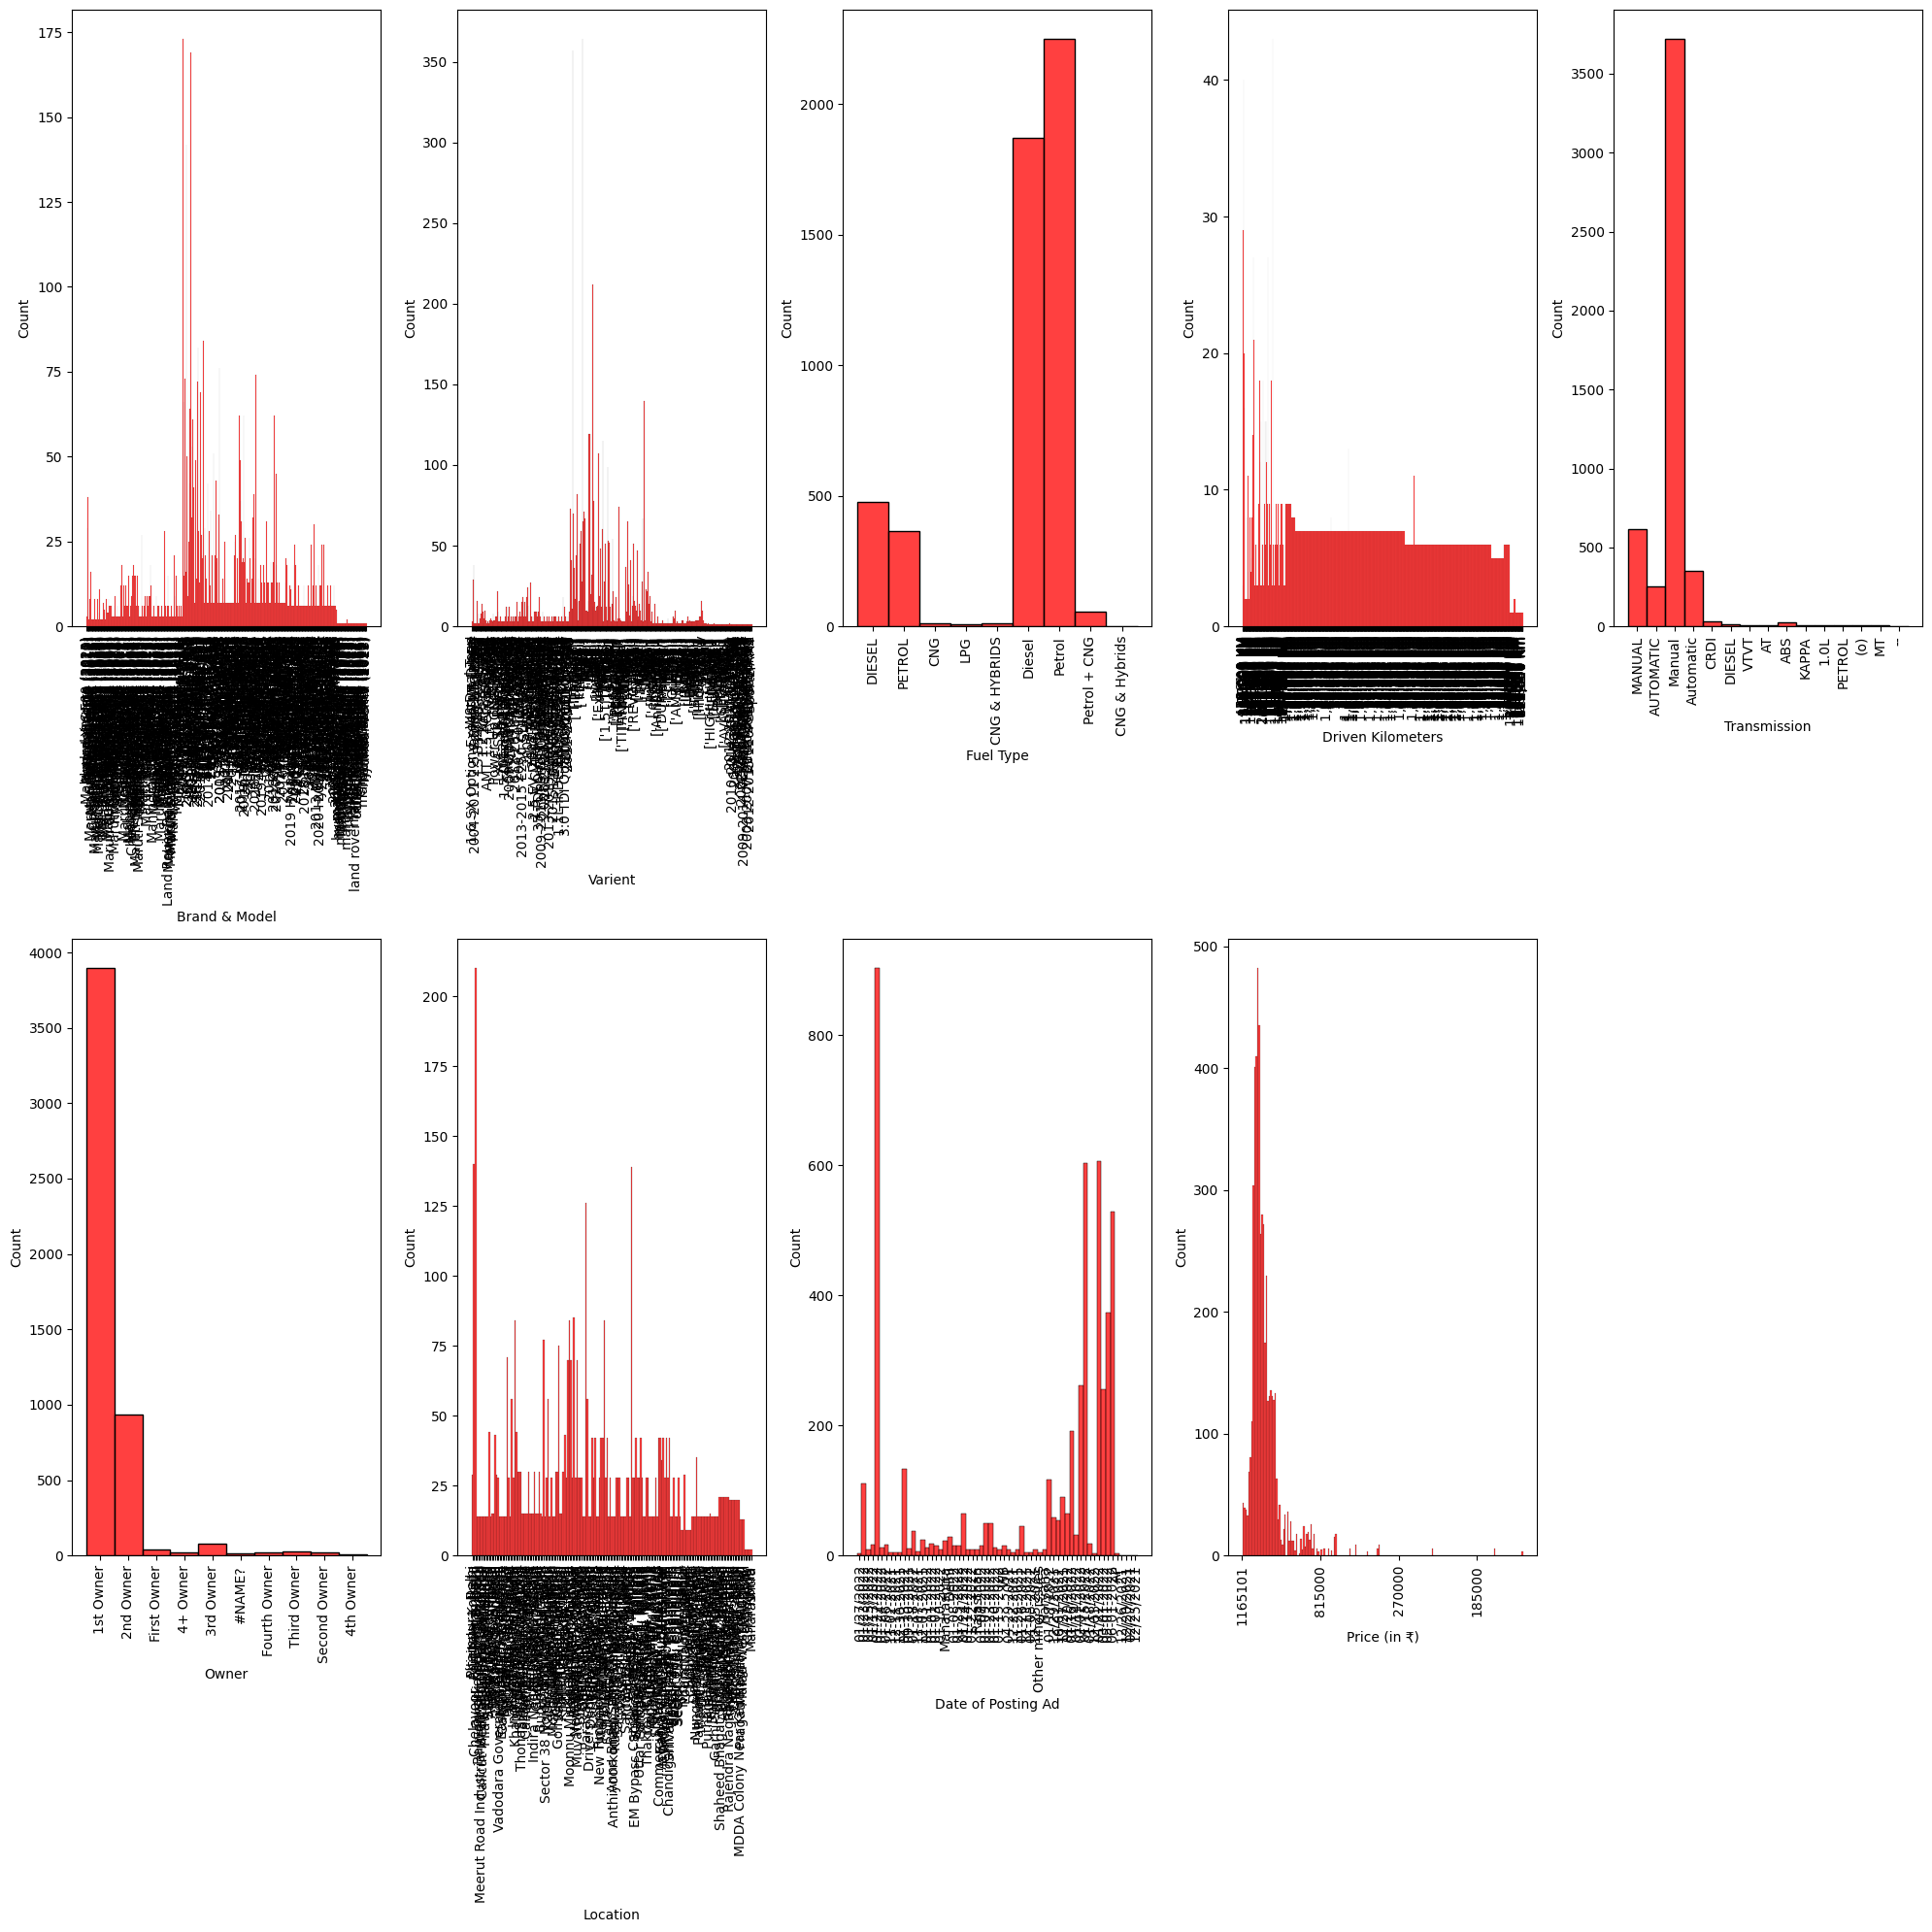

In [ ]:
import matplotlib.pyplot as plt
collist=disp.columns.values
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(2,5,i+1)
    sn.histplot(data=disp[collist[i]],color='red').set_xticklabels(labels=disp[collist[i]].unique(),rotation=90)
    plt.tight_layout()

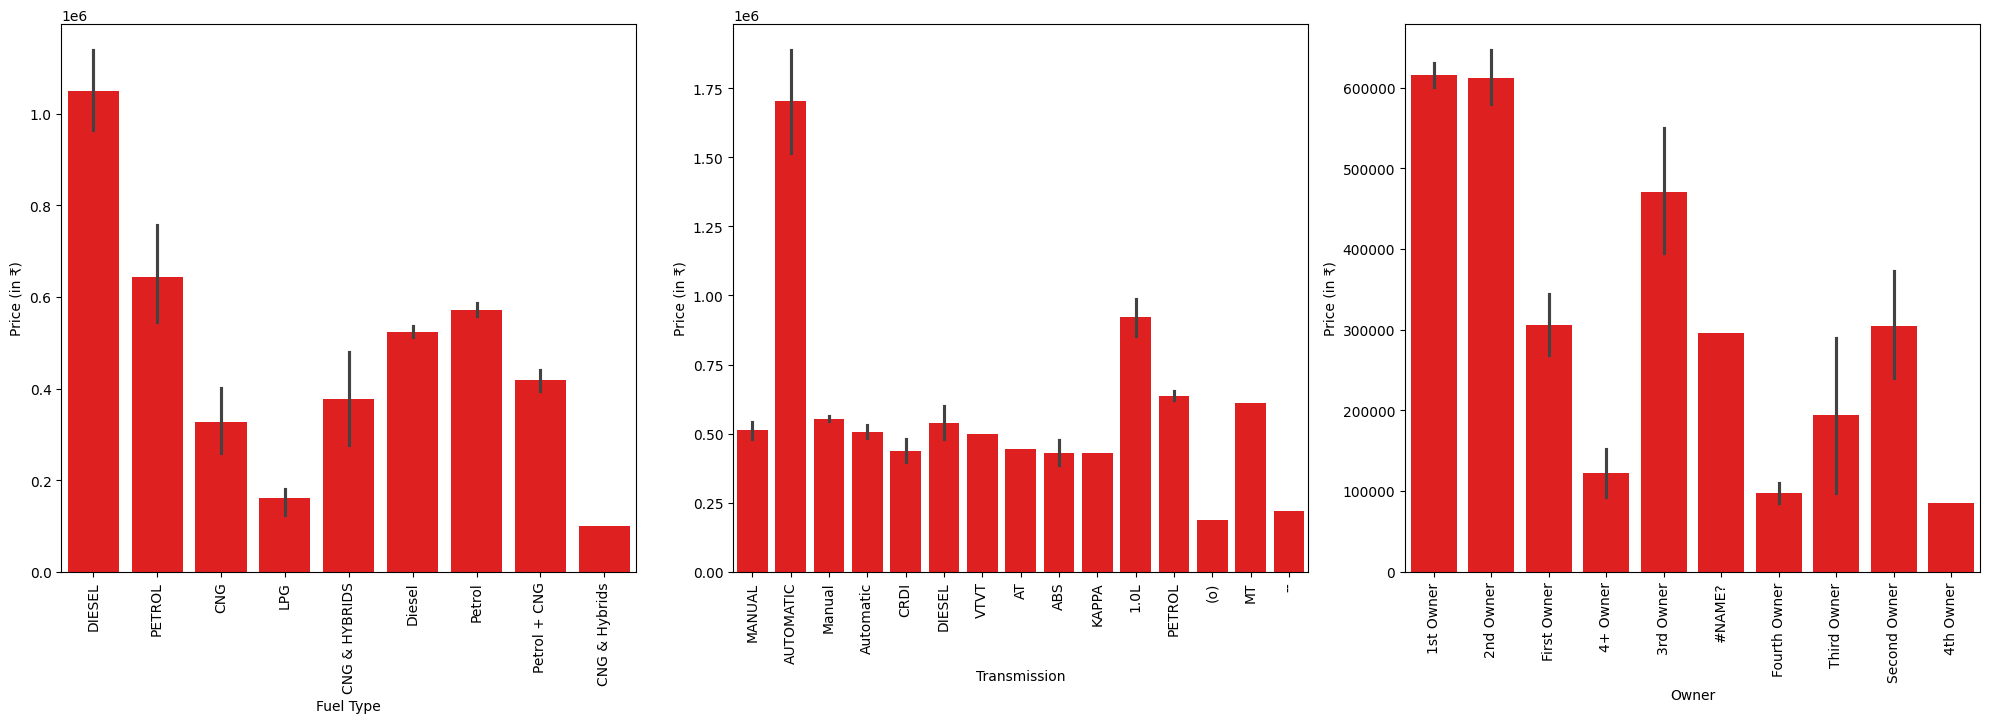

In [ ]:
newcollist=['Fuel Type','Transmission','Owner']
plt.figure(figsize=(20,20))
for i in enumerate(newcollist):
    plt.subplot(3,3,i[0]+1)
    sn.barplot(data=disp,x=i[1],y='Price (in ₹)',color='red')
    plt.xticks(rotation=90)
    plt.tight_layout()

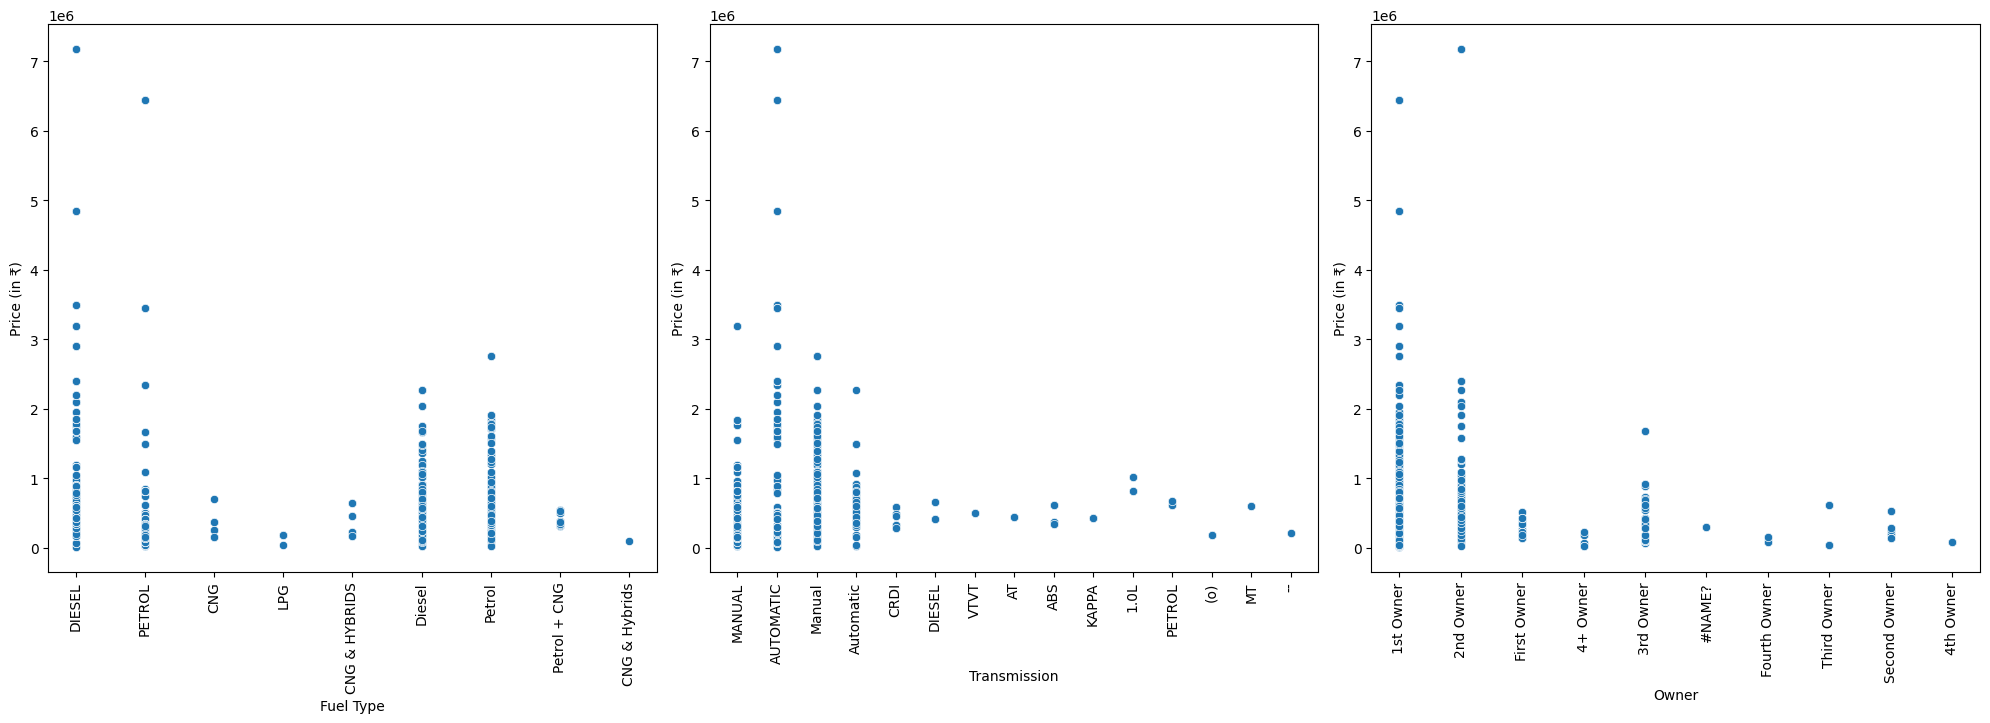

In [ ]:
newcollist=['Fuel Type','Transmission','Owner']
plt.figure(figsize=(20,20))
for i in enumerate(newcollist):
    plt.subplot(3,3,i[0]+1)
    sn.scatterplot(data=disp,x=i[1],y='Price (in ₹)')
    plt.xticks(rotation=90)
    plt.tight_layout()


In [ ]:
from cuml.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.drop(['Price (in ₹)'],axis=1).columns:
    df[column]=le.fit_transform(df[column])
df


,Brand & Model,Varient,Fuel Type,Driven Kilometers,Transmission,Owner,Location,Date of Posting Ad,Price (in ₹)
0,266,143,3,537,10,1,123,31,435000
1,243,22,3,415,10,1,2,28,1165101
2,255,130,6,156,10,2,33,30,815000
3,226,79,6,79,10,1,115,20,270000
4,246,121,6,650,10,1,42,20,185000
...,...,...,...,...,...,...,...,...,...
5045,355,87,5,479,6,1,6,28,50000
5046,369,56,4,95,12,1,81,28,320000
5047,348,122,7,467,6,1,126,28,599000
5048,350,131,7,580,12,1,87,31,395000


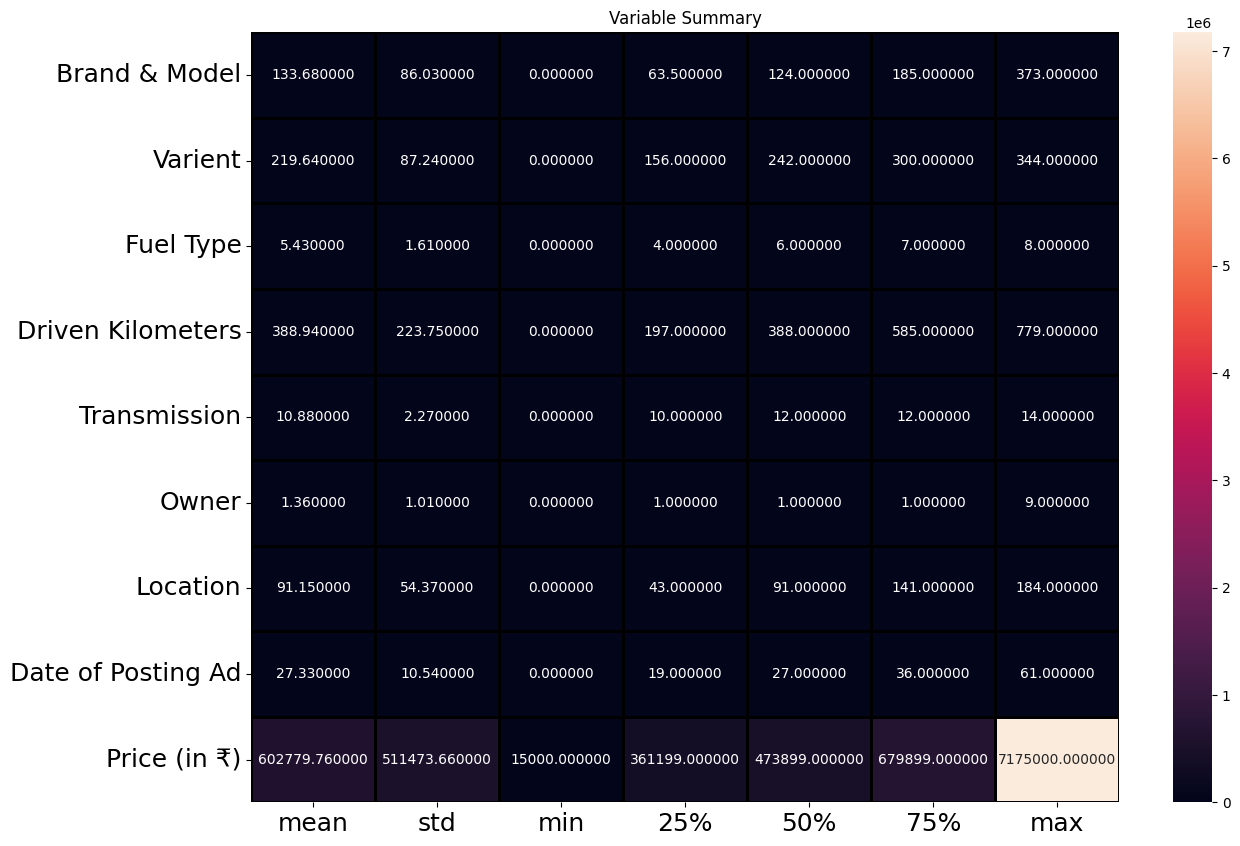

In [ ]:
plt.figure(figsize=(14,10))
sn.heatmap(round(xl.describe()[1:].transpose(),2),lw=2,linecolor='black',annot=True,fmt='f',color='red')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Variable Summary')
plt.show()

<Axes: >

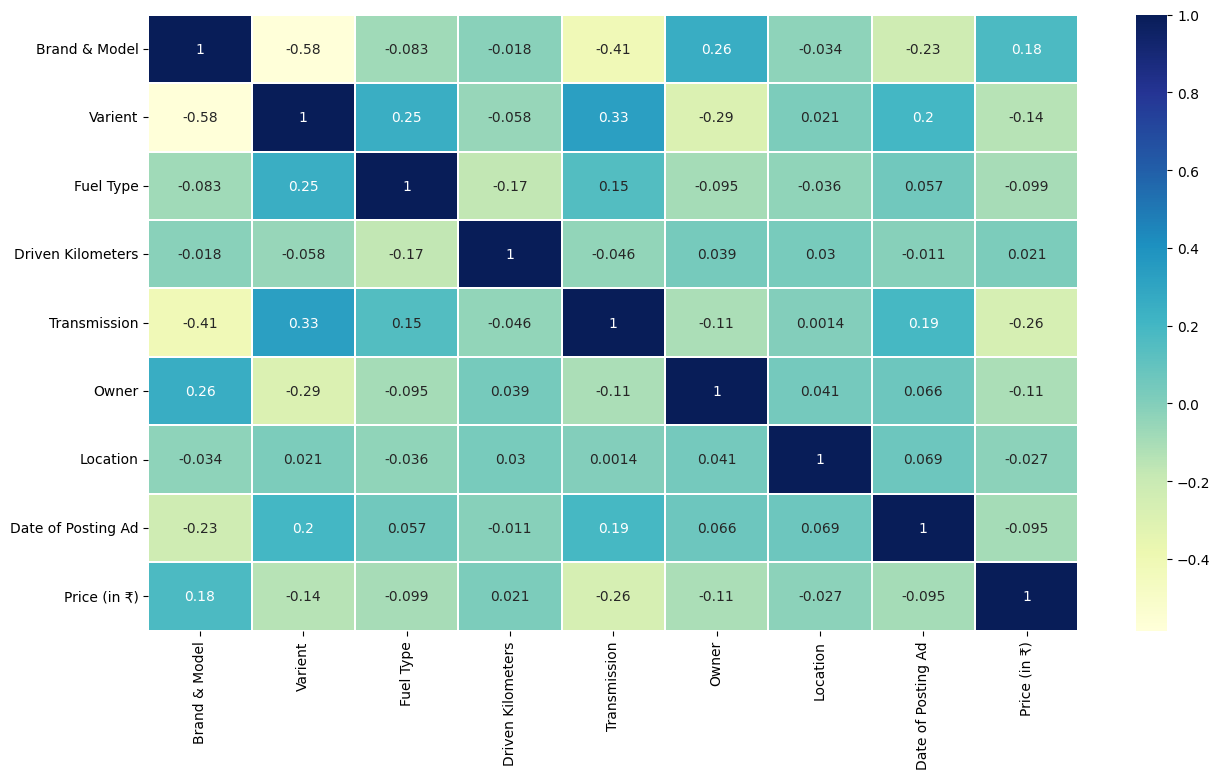

In [ ]:
plt.figure(figsize=(15,8))
xl = df.to_pandas()
sn.heatmap(xl.corr(), linewidth=0.1, cmap="YlGnBu", annot = True)

In [ ]:
x= df.drop(['Price (in ₹)'],axis=1)
y= df['Price (in ₹)']
x

,Brand & Model,Varient,Fuel Type,Driven Kilometers,Transmission,Owner,Location,Date of Posting Ad
0,266,143,3,537,10,1,123,31
1,243,22,3,415,10,1,2,28
2,255,130,6,156,10,2,33,30
3,226,79,6,79,10,1,115,20
4,246,121,6,650,10,1,42,20
...,...,...,...,...,...,...,...,...
5045,355,87,5,479,6,1,6,28
5046,369,56,4,95,12,1,81,28
5047,348,122,7,467,6,1,126,28
5048,350,131,7,580,12,1,87,31


In [ ]:
from cuml.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')


/usr/local/lib/python3.10/dist-packages/cupy/cuda/compiler.py:233: PerformanceWarning: Jitify is performing a one-time only warm-up to populate the persistent cache, this may take a few seconds and will be improved in a future release...
  jitify._init_module()


In [ ]:
from cuml.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)

In [ ]:
x

,0,1,2,3,4,5,6,7
0,1.382685,-0.937443,-1.471401,0.690886,-1.201426,-0.445412,0.629077,0.390776
1,1.200537,-2.061471,-1.471401,0.206102,-1.201426,-0.445412,-1.958709,0.114197
2,1.296628,-1.076654,0.324544,-1.000453,-1.201426,1.408020,-1.030370,0.299367
3,1.060122,-1.587329,0.324544,-1.459552,-1.201426,-0.445412,0.502387,-0.663669
4,1.224784,-1.171070,0.324544,1.112193,-1.201426,-0.445412,-0.828508,-0.663669
...,...,...,...,...,...,...,...,...
5006,2.020404,-1.511469,-0.304922,0.464858,-2.024064,-0.445412,-1.789614,0.114197
5007,2.112843,-1.794553,-0.904948,-1.356289,0.554662,-0.445412,-0.069718,0.114197
5008,1.973479,-1.160662,0.980363,0.417136,-2.024064,-0.445412,0.675937,0.114197
5009,1.986936,-1.066062,0.980363,0.853949,0.554662,-0.445412,0.035854,0.390776


In [ ]:
import time


In [ ]:
from cuml.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 45)

In [ ]:
from cuml.neighbors import KNeighborsRegressor
from cuml.metrics import r2_score

In [ ]:
knr = KNeighborsRegressor()
start_time_cpu = time.time()
knr.fit(xtrain,ytrain,convert_dtype=True)
pred_train_knr=knr.predict(xtrain)
pred_test_knr=knr.predict(xtest)
end_time_cpu = time.time()
execution_time_cpu = end_time_cpu - start_time_cpu
print("Execution time on GPU: {} seconds".format(execution_time_cpu))

Execution time on GPU: 0.04045891761779785 seconds


In [ ]:
ytest.dtype

dtype('int64')

In [ ]:
ytest = np.array(ytest, dtype=np.float64)
pred_test_knr = np.array(pred_test_knr, dtype=np.float64)

In [ ]:
print('K Neighbors Regressor r2_score:',r2_score(ytest,pred_test_knr))

K Neighbors Regressor r2_score: 0.5211879741520559


In [ ]:
from cuml.ensemble import RandomForestRegressor

In [ ]:
start_time_cpu = time.time()
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
pred_train_rf=rf.predict(xtrain)
pred_test_rf=rf.predict(xtest)
print('Random Forest Regressor r2_score:',r2_score(ytest,pred_test_rf))
end_time_cpu = time.time()
execution_time_cpu = end_time_cpu - start_time_cpu
print("Execution time on GPU: {} seconds".format(execution_time_cpu))

/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Random Forest Regressor r2_score: 0.8861984442319841
Execution time on GPU: 1.7585117816925049 seconds


In [ ]:
from cuml.model_selection import GridSearchCV

parameter = { 'bootstrap': [True, False],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],}


start_time_cpu = time.time()
gvc = GridSearchCV(RandomForestRegressor(),parameter,cv=5)
gvc.fit(xtrain,ytrain)
gvc.best_params_
end_time_cpu = time.time()
execution_time_cpu = end_time_cpu - start_time_cpu
print("Execution time on GPU: {} seconds".format(execution_time_cpu))

Execution time on GPU: 142.517840385437 seconds


In [ ]:
start_time_cpu = time.time()
pricecar = RandomForestRegressor(bootstrap=True ,min_samples_leaf=1, max_features='auto', min_samples_split=2 , n_estimators=1000)
pricecar.fit(xtrain,ytrain)
pred=pricecar.predict(xtest)
acc=r2_score(ytest,pred)
print('Random Forest Regressor Tuned r2_score:',acc)
end_time_cpu = time.time()
execution_time_cpu = end_time_cpu - start_time_cpu
print("Execution time on GPU: {} seconds".format(execution_time_cpu))


Random Forest Regressor Tuned r2_score: 0.88755450045658
Execution time on GPU: 3.549604892730713 seconds


In [ ]:
a= np.array(ytest)
b= np.array(pred)

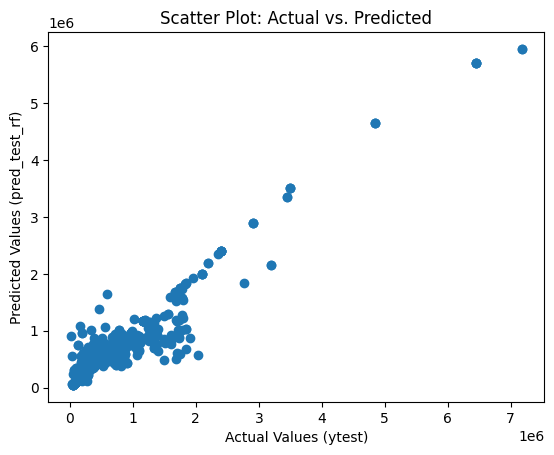

In [ ]:
plt.scatter(a.get(), b.get())
plt.xlabel('Actual Values (ytest)')
plt.ylabel('Predicted Values (pred_test_rf)')
plt.title('Scatter Plot: Actual vs. Predicted')
plt.show()

In [ ]:
from cuml.linear_model import MBSGDRegressor as cumlMBSGDRegressor
start_time_cpu = time.time()
cu_mbsgd_regressor = cumlMBSGDRegressor( epochs= 5)
cu_mbsgd_regressor.fit(xtrain,ytrain)
pred=cu_mbsgd_regressor.predict(xtest)
acc=r2_score(ytest,pred)
print('SGD r2_score:',acc)
end_time_cpu = time.time()
execution_time_cpu = end_time_cpu - start_time_cpu
print("Execution time on GPU: {} seconds".format(execution_time_cpu))

SGD r2_score: 0.05240104283984659
Execution time on GPU: 0.05460786819458008 seconds
